# ==========================================
## PRUEBA TÉCNICA: CIENTÍFICO DE DATOS
## MODELO DE SCORING - PRODUCTO ALTA GAMA
# ==========================================

# Modelo de selección de clientes - Producto Alta Gama

## 1. Introducción y justificación de la variable objetivo

En este proyecto, buscamos identificar clientes con **bajo riesgo** para la asignación de un producto de alta gama. Dado que este segmento implica beneficios exclusivos y líneas de crédito superiores, la precisión en la selección es fundamental para la salud financiera de la compañía

---

### **Selección de la Variable Target**
Para este modelo, se ha seleccionado la variable **`Mora30`** como el objetivo (*target*) a predecir.



### **Justificación**
La elección de **Mora30** se fundamenta en los siguientes pilares:

* **Baja tolerancia al riesgo:** Para un producto de alta gama con cupos elevados, la compañia no puede permitirse desviaciones amplias en el comportamiento de pago.

* **Alerta temprana:** La mora de 30 días actúa como un indicador preventivo. Identificar un retraso en esta etapa permite tomar acciones antes de que el comportamiento se deteriore.

* **Control de exposición:** Esperar a una métrica como *Mora60* permitiría que clientes que ya presentan dificultades sigan utilizando cupos altos, aumentando significativamente la **exposición financiera** y la pérdida esperada de la compañía.

### **Sustentación Académica: Selección de la Variable Target**

La selección de **Mora30** (retraso en el pago $\geq$ 30 días) como variable objetivo (*target*) se fundamenta en los estándares de la industria financiera y la literatura académica de gestión de riesgo:

---

### 1. Criterio de “Incremento significativo en el riesgo de crédito” - ("Significant Increase in Credit Risk" (SICR))
Bajo la normativa **IFRS 9**, el umbral de los 30 días es un estándar crítico. Según **Baesens et al. (2016)**, el incumplimiento de corto plazo es el predictor más robusto del deterioro crediticio futuro. 
* **Presunción de Riesgo:** La norma internacional establece una presunción de que el riesgo crediticio ha aumentado significativamente cuando los pagos tienen más de 30 días de atraso, obligando a las instituciones a medir pérdidas esperadas de toda la vida del activo.

### 2. Sistemas de Alerta Temprana (Early Warning Systems)
La literatura de gestión de riesgo (**Saunders & Allen, 2010**) sostiene que los modelos de mora temprana son superiores para productos de alta exposición.

* **Proactividad:** Utilizar una ventana de 30 días permite una reacción institucional antes de que el perfil del cliente se deteriore irreversiblemente.

* **Control de Severidad:** Como señala **Anderson (2021)**, esperar a horizontes de mora más largos (60 o 90 días) aumenta la **Pérdida en Caso de Incumplimiento (LGD)**, reduciendo las posibilidades de recuperación exitosa.



### 3. Optimización de la Exposición Financiera (EAD)
En productos de cupos elevados, la **Exposición al Momento del Incumplimiento (EAD)** es el factor de riesgo más crítico.

* **Acciones de Mitigación:** Identificar la Mora30 permite ejecutar bloqueos preventivos o reducción de cupos. 

* **Eficacia:** Autores como **Thomas et al. (2017)** enfatizan que la rapidez de respuesta ante los **primeros signos de incumplimiento** es inversamente proporcional a la severidad de la pérdida final.

---

### Referencias Bibliográficas

* **Anderson, R. (2021).** *The Credit Scoring Toolkit: Theory and Practice for Retail Credit Risk Management and Decision Automation*. Oxford University Press.
* **Baesens, B., Roesch, D., & Scheule, H. (2016).** *Credit Risk Analytics: Measurement Techniques, Applications, and Examples in SAS*. Wiley.
* **IFRS Foundation (2014).** *International Financial Reporting Standard 9: Financial Instruments*.
* **Saunders, A., & Allen, L. (2010).** *Credit Risk Management In and Out of the Financial Crisis*. Wiley.

## 2. Carga de librerías y datos

Para el desarrollo de este modelo, utilizaremos las librerías estándar del ecosistema de ciencia de datos en Python, las cuales nos permitirán realizar desde el procesamiento de datos hasta la construcción del modelo.

### Librerías a utilizar:

* **`pandas` y `numpy`:** Para la manipulación de estructuras de datos y operaciones numéricas.

* **`matplotlib` y `seaborn`:** Para la visualización de datos y análisis exploratorio.

* **`scikit-learn`:** Para el preprocesamiento, división de datos y entrenamiento del modelo
 (Regresión Logística, métricas de desempeño y preprocesamiento).

---

### Importación de librerías

In [ ]:
# Instalar seaborn
%pip install seaborn

In [ ]:
# Instalación de Scikit-Learn y dependencias necesarias
%pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Herramientas de modelado y preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Configuración de visualización
%matplotlib inline
sns.set_theme(style="whitegrid")

### Cargue de datos

In [61]:
try:
    df = pd.read_excel(r'c:\Users\cmune\Downloads\ProductoNuevo.xlsx')
    print("Datos cargados exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

print(f"El dataset tiene {df.shape[0]} registros y {df.shape[1]} columnas.")
df.head()

Datos cargados exitosamente.
El dataset tiene 4315 registros y 22 columnas.


,ID,FFECHA,Mora30,Mora60,MoraMax_UltimoSemestre,ExperienciaSectorFinanciero,PersonasCargo,GastosFamiliares,GastoArriendo,TiempoActividadAnios,...,Edad,Estado_Civil,Genero,Ingresos,Nivel_Academico,Tipo_Vivienda,TiempoClienteMeses,Tiempo_SistemaFro,PORCEND,Obligaciones_SistemaFro
0,1,201710,0,0,0,0,0,7837.87,0,10,...,61,CASADO,MASCULINO,11698.313433,TECNÓLOGO,PROPIA,40,0,1.020685,0
1,2,201711,1,0,59,0,1,9194.07,0,1,...,45,CASADO,FEMENINO,13722.492537,TECNÓLOGO,ALQUILADA,0,0,0.543829,0
2,3,201704,0,0,30,1,1,8450.00,0,1,...,55,CASADO,MASCULINO,12611.940299,BACHILLER,PROPIA,13,73,0.946746,0
3,4,201707,1,0,47,0,0,7472.00,0,1,...,35,SOLTERO,MASCULINO,11152.238806,UNIVERSITARIO,FAMILIAR,1,0,0.936831,0
4,5,201709,0,0,0,0,0,6160.00,0,2,...,58,SOLTERO,MASCULINO,9194.029851,UNIVERSITARIO,FAMILIAR,0,0,0.487013,0


## 3. Análisis Exploratorio de Datos (EDA)

Un paso fundamental antes de entrenar cualquier modelo es "conocer los datos". Esto permite identificar desequilibrios en las clases, detectar valores faltantes y entender las relaciones entre las variables.

En esta sección realizaremos:

1. **Inspección de estructura:** Verificación de tipos de datos, datos duplicados y valores nulos.

2. **Análisis del Target:** Revisar si nuestra variable `Mora30` está balanceada.

3. **Justificación de la variable Target:** Se elige 'Mora30' porque en un producto de alta gama y alta exposición, la compañia necesita detectar señales tempranas de riesgo (alerta temprana) para proteger el capital.

4. **Análisis de Correlación:** Identificar qué variables tienen mayor impacto sobre el incumplimiento.

In [23]:
# 1. Verificación de nulos y tipos de datos
print("--- Estructura del Dataset ---")
print(df.info())

--- Estructura del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4315 entries, 0 to 4314
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4315 non-null   int64  
 1   FFECHA                       4315 non-null   int64  
 2   Mora30                       4315 non-null   int64  
 3   Mora60                       4315 non-null   int64  
 4   MoraMax_UltimoSemestre       4315 non-null   int64  
 5   ExperienciaSectorFinanciero  4315 non-null   int64  
 6   PersonasCargo                4315 non-null   int64  
 7   GastosFamiliares             4315 non-null   float64
 8   GastoArriendo                4315 non-null   int64  
 9   TiempoActividadAnios         4315 non-null   int64  
 10  OCUPACION                    4315 non-null   object 
 11  TIPCONTRATO                  4315 non-null   object 
 12  Edad                         4315 non-null   

In [24]:
df.describe()

,ID,FFECHA,Mora30,Mora60,MoraMax_UltimoSemestre,ExperienciaSectorFinanciero,PersonasCargo,GastosFamiliares,GastoArriendo,TiempoActividadAnios,Edad,Ingresos,TiempoClienteMeses,Tiempo_SistemaFro,PORCEND,Obligaciones_SistemaFro
count,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000
mean,2158.000000,201717.638702,0.243569,0.116802,26.903824,0.339513,0.371958,7500.444514,7101.276246,203.674855,33.746466,11125.760641,12.298030,16.486906,0.766671,0.314484
std,1245.777535,30.029725,0.429285,0.321221,40.907052,0.473599,0.760037,1195.488587,34264.226793,13196.756767,10.357882,1730.380499,21.652665,31.185404,0.251832,0.543057
min,1.000000,201701.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,18.000000,8955.223881,0.000000,0.000000,0.204082,0.000000
25%,1079.500000,201705.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6200.000000,0.000000,1.000000,27.000000,9205.223881,0.000000,0.000000,0.487013,0.000000
50%,2158.000000,201708.000000,0.000000,0.000000,17.000000,0.000000,0.000000,7308.340000,0.000000,1.000000,30.000000,10813.432836,4.000000,0.000000,0.946292,0.000000
75%,3236.500000,201711.000000,0.000000,0.000000,30.000000,1.000000,0.000000,8490.870000,0.000000,3.000000,38.000000,12546.485075,14.000000,20.500000,1.000000,1.000000
max,4315.000000,201809.000000,1.000000,1.000000,364.000000,1.000000,6.000000,13000.000000,300000.000000,866880.000000,69.000000,14916.417910,339.000000,339.000000,1.076923,4.000000


In [25]:
#Validamos si tenemos registros duplicados en la data
duplicates = df.duplicated(keep=False)
print("Duplicate rows:\n", df[duplicates])

#Validamos si tenemos datos ausentes que tengamos que imputar
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values[missing_values > 0])

Duplicate rows:
 Empty DataFrame
Columns: [ID, FFECHA, Mora30, Mora60, MoraMax_UltimoSemestre, ExperienciaSectorFinanciero, PersonasCargo, GastosFamiliares, GastoArriendo, TiempoActividadAnios, OCUPACION, TIPCONTRATO, Edad, Estado_Civil, Genero, Ingresos, Nivel_Academico, Tipo_Vivienda, TiempoClienteMeses, Tiempo_SistemaFro, PORCEND, Obligaciones_SistemaFro]
Index: []

[0 rows x 22 columns]

Missing values:
 Series([], dtype: int64)


C:\Users\cmune\AppData\Local\Temp\ipykernel_25312\3370713309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Mora30', data=df, palette='viridis')


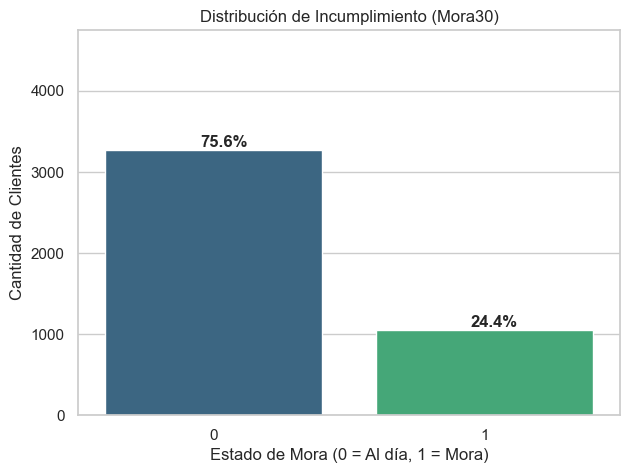

In [63]:
# 2. Distribución de la variable objetivo
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Mora30', data=df, palette='viridis')

# Calculamos el total de registros
total = len(df['Mora30'])

# Agregamos las etiquetas de porcentaje sobre cada barra
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + (total * 0.01) # Un pequeño offset arriba de la barra
    ax.annotate(percentage, (x, y), fontsize=12, fontweight='bold')

plt.title('Distribución de Incumplimiento (Mora30)')
plt.xlabel('Estado de Mora (0 = Al día, 1 = Mora)')
plt.ylabel('Cantidad de Clientes')
plt.ylim(0, total * 1.1) # Ajustamos el límite superior para que quepa el texto
plt.show()

### Análisis de la Distribución

**Desbalance de clases:** Observamos que el 24.4% de la muestra presenta Mora30. Aunque hay una mayoría de clientes al día (75.6%), el desbalance no es extremo (como ocurre en otros productos donde la mora es menor al 5%).

**Implicación para el Modelo:** Un 24% de eventos positivos es suficiente para que una Regresión Logística aprenda bien los patrones sin necesidad de recurrir obligatoriamente a técnicas complejas de remuestreo (como SMOTE), aunque se debe vigilar la precisión en la clase 1.

**Contexto de Alta Gama:** Para un producto de "Alta Gama", un 24% de mora es considerablemente alto. Esto refuerza la necesidad de un modelo de selección estricto para filtrar mejor a los prospectos.

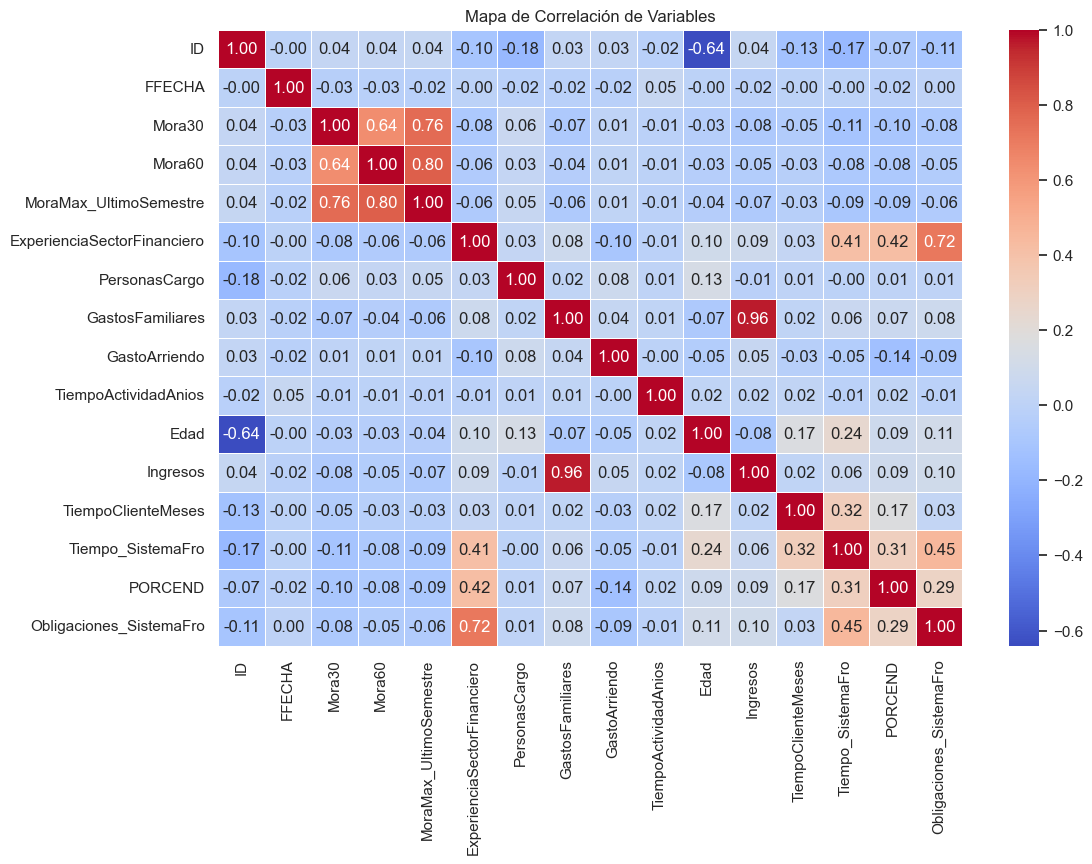

In [65]:
# 3. Correlación inicial
# Filtramos solo columnas numéricas para el cálculo de correlación
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlación de Variables')
plt.show()

1. Gráfico de Dispersión: Ingresos vs. Gastos (Segmentado por Mora)
Este gráfico justifica por qué creamos el Ratio. Verás que los morosos (puntos verdes en tu gráfico original) suelen estar en zonas donde el gasto se acerca peligrosamente al ingreso.

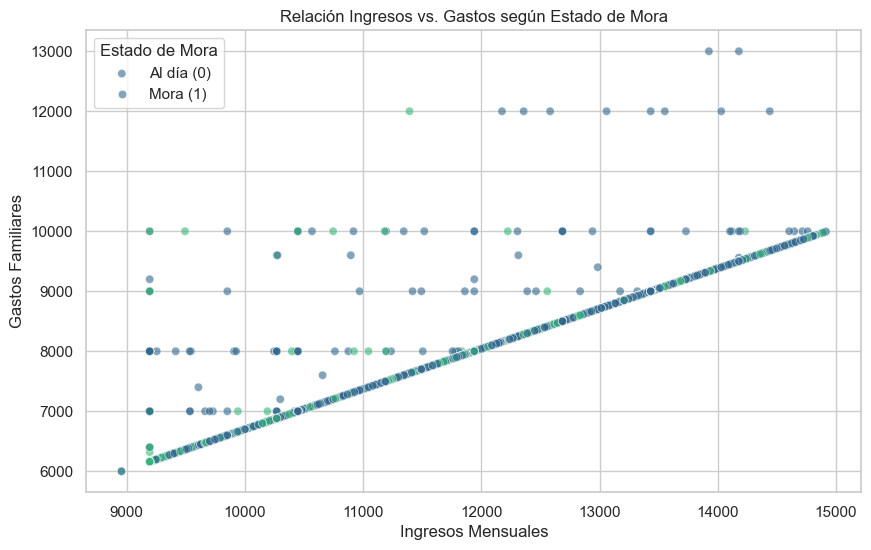

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ingresos', y='GastosFamiliares', hue='Mora30', alpha=0.6, palette='viridis')
plt.title('Relación Ingresos vs. Gastos según Estado de Mora')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Gastos Familiares')
plt.legend(title='Estado de Mora', labels=['Al día (0)', 'Mora (1)'])
plt.show()

Qué decir en la sustentación: "Como observamos, existe una correlación lineal casi perfecta (0.96) entre ingresos y gastos. Sin embargo, los clientes en mora no se concentran solo en ingresos bajos, sino donde la brecha entre lo que ganan y gastan es mínima. Esto justificó la creación de nuestra variable de Ratio para el modelo final."

2. Boxplot: Tiempo en el Sistema Financiero (Tu variable #1)
Dado que Tiempo_SistemaFro es tu variable más importante (Score 39.06), debes mostrarla aquí. Un Boxplot revelará que los morosos suelen tener menos antigüedad.

C:\Users\cmune\AppData\Local\Temp\ipykernel_25312\1816592510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mora30', y='Tiempo_SistemaFro', data=df, palette='magma')


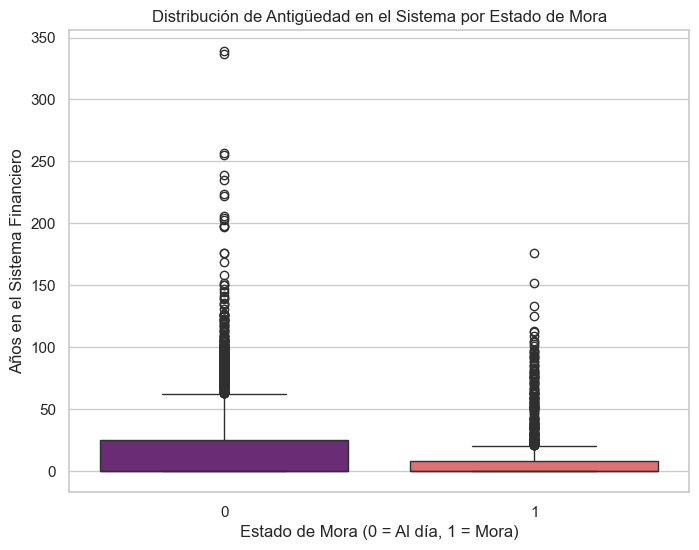

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Mora30', y='Tiempo_SistemaFro', data=df, palette='magma')
plt.title('Distribución de Antigüedad en el Sistema por Estado de Mora')
plt.xlabel('Estado de Mora (0 = Al día, 1 = Mora)')
plt.ylabel('Años en el Sistema Financiero')
plt.show()

Qué decir: "El análisis descriptivo ya nos daba pistas: la mediana de años en el sistema de los clientes que cumplen (0) es visiblemente superior a la de aquellos que caen en mora (1). La estabilidad es el mejor predictor de pago en Alta Gama."

3. Gráfico de Densidad: Porcentaje de Endeudamiento (PORCEND)
Esta es tu segunda variable más fuerte. Un gráfico de densidad mostrará si los morosos tienen "picos" de endeudamiento más altos.

C:\Users\cmune\AppData\Local\Temp\ipykernel_25312\739353097.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Mora30'] == 0]['PORCEND'], label='Al día', shade=True, color="blue")
C:\Users\cmune\AppData\Local\Temp\ipykernel_25312\739353097.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Mora30'] == 1]['PORCEND'], label='Mora', shade=True, color="red")


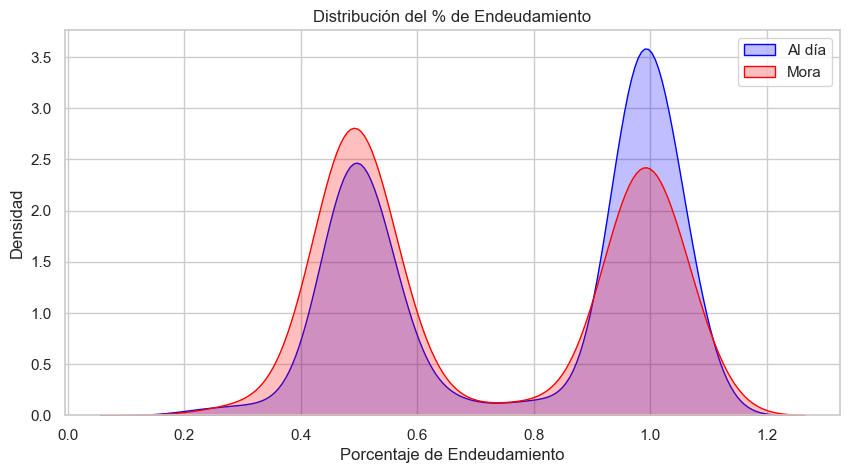

In [69]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Mora30'] == 0]['PORCEND'], label='Al día', shade=True, color="blue")
sns.kdeplot(df[df['Mora30'] == 1]['PORCEND'], label='Mora', shade=True, color="red")
plt.title('Distribución del % de Endeudamiento')
plt.xlabel('Porcentaje de Endeudamiento')
plt.ylabel('Densidad')
plt.legend()
plt.show()

## 4. Preprocesamiento de Datos

Basado en el análisis visual anterior, prepararemos los datos para el modelo de Regresión Logística. 


Pasos a seguir:

1. **Selección de Variables:** Eliminaremos `ID` y `FFECHA` (no aportan valor predictivo) y variables con altísima correlación para evitar redundancia.

2. **Codificación Categórica:** Transformaremos las variables de texto en variables numéricas (*dummies*) usando One-Hot Encoding.

3. **Escalado de Variables:** Aplicaremos `StandardScaler` para que variables como `Ingresos` (números grandes) y `Edad` (números pequeños) estén en la misma escala.

4. **División del Dataset:** Separaremos los datos en entrenamiento (80%) y prueba (20%).

In [62]:
# 1. Selección de variables inicial

# Eliminamos lo que no es predictivo o causa fuga de datos
df_clean = df.drop(['Mora60', 'MoraMax_UltimoSemestre', 'ID', 'FFECHA'], axis=1)


# 2. Convertir texto a números (One-Hot Encoding)

# El comando pd.get_dummies busca columnas categóricas y las convierte en columnas numéricas.
# Esto transformará columnas como 'Tipo_Empleado' en varias columnas de 0 y 1
df_final = pd.get_dummies(df_clean, drop_first=True)


# 3. Separación de variables (X) y objetivo (y)
X = df_final.drop('Mora30', axis=1)
y = df_final['Mora30']


# 4. División entrenamiento y prueba (80% training / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 5. Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Ahora todas las variables son numéricas y están escaladas.")
print(f"Nuevas columnas tras codificación: {X.shape[1]}")
df_final.head()

Ahora todas las variables son numéricas y están escaladas.
Nuevas columnas tras codificación: 29


,Mora30,ExperienciaSectorFinanciero,PersonasCargo,GastosFamiliares,GastoArriendo,TiempoActividadAnios,Edad,Ingresos,TiempoClienteMeses,Tiempo_SistemaFro,...,Estado_Civil_OTROS,Estado_Civil_SOLTERO,Estado_Civil_VIUDO,Genero_MASCULINO,Nivel_Academico_ESPECIALIZACIÓN,Nivel_Academico_OTROS,Nivel_Academico_TECNÓLOGO,Nivel_Academico_UNIVERSITARIO,Tipo_Vivienda_FAMILIAR,Tipo_Vivienda_PROPIA
0,0,0,0,7837.87,0,10,61,11698.313433,40,0,...,False,False,False,True,False,False,True,False,False,True
1,1,0,1,9194.07,0,1,45,13722.492537,0,0,...,False,False,False,False,False,False,True,False,False,False
2,0,1,1,8450.00,0,1,55,12611.940299,13,73,...,False,False,False,True,False,False,False,False,False,True
3,1,0,0,7472.00,0,1,35,11152.238806,1,0,...,False,True,False,True,False,False,False,True,True,False
4,0,0,0,6160.00,0,2,58,9194.029851,0,0,...,False,True,False,True,False,False,False,True,True,False


## 5. Modelado: Regresión Logística

Para este proyecto de Credit Scoring, hemos seleccionado la **Regresión Logística** como algoritmo principal.

### ¿Por qué este modelo?
1. **Interpretabilidad:** En el sector financiero (especialmente en productos de Alta Gama), es imperativo poder explicar por qué se aprueba o rechaza una solicitud. Este modelo permite ver el peso de cada variable.
2. **Estándar de la Industria:** Es la base de los *Scorecards* tradicionales debido a su estabilidad y facilidad de implementación en sistemas de decisión en tiempo real.
3. **Eficiencia:** Requiere menos recursos computacionales y funciona muy bien cuando existen relaciones lineales entre las variables y el log-odds de la mora, que luego se traduce a probabilidad.




### Nota Técnica: El Log-Odds
La Regresión Logística funciona mediante la función **Logit**, que modela el **Log-Odds** de la mora como una combinación lineal de las variables de entrada:

$$\ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \dots + \beta_nX_n$$

Esto permite que el modelo asigne pesos ($\beta$) a variables como el ingreso o la edad, transformando una suma lineal en una probabilidad confinada entre 0 y 1 mediante la función sigmoide.

Ejemplo: Si un cliente tiene un 20% de probabilidad de mora, sus Odds son $0.20 / 0.80 = 0.25$. Esto significa que por cada cliente que entra en mora, hay 4 que no.

In [ ]:
# 1. Entrenar el modelo
# Usamos random_state para que los resultados sean replicables
modelo_riesgo = LogisticRegression(random_state=42, max_iter=1000)
modelo_riesgo.fit(X_train_scaled, y_train)

# 2. Predicciones de clase (0 o 1)
y_pred = modelo_riesgo.predict(X_test_scaled)

# 3. Predicciones de probabilidad (Score)
# El 'score' es la probabilidad de que el cliente caiga en Mora30
y_prob = modelo_riesgo.predict_proba(X_test_scaled)[:, 1]

print("Modelo entrenado exitosamente.")
print(f"Primeras 5 probabilidades de mora calculadas: \n{y_prob[:5]}")

Modelo entrenado exitosamente.
Primeras 5 probabilidades de mora calculadas: 
[0.24716476 0.09727196 0.28202651 0.20630154 0.23214788]


## 6. Evaluación del Modelo

Para determinar si el modelo es útil para la toma de decisiones en productos de Alta Gama, analizaremos tres herramientas clave:

1. **Matriz de Confusión:** Para ver cuántos clientes en mora clasificamos erróneamente como buenos (Falsos Negativos).
2. **Reporte de Clasificación:** Donde observaremos la **Precisión** (de los que dije que caerían en mora, ¿cuántos lo hicieron?) y el **Recall** (de todos los que cayeron en mora, ¿a cuántos logré detectar?).
3. **Curva ROC y AUC:** Para medir la capacidad del modelo para separar las clases (clientes buenos vs. malos).

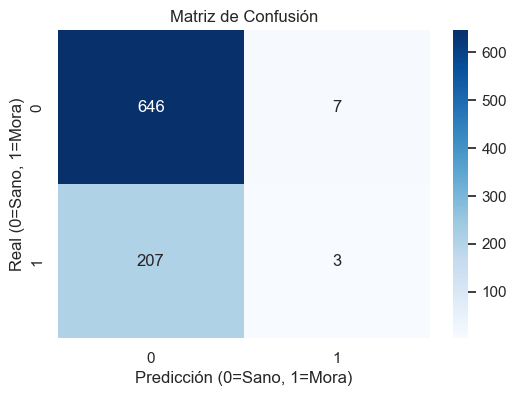

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       653
           1       0.30      0.01      0.03       210

    accuracy                           0.75       863
   macro avg       0.53      0.50      0.44       863
weighted avg       0.65      0.75      0.66       863



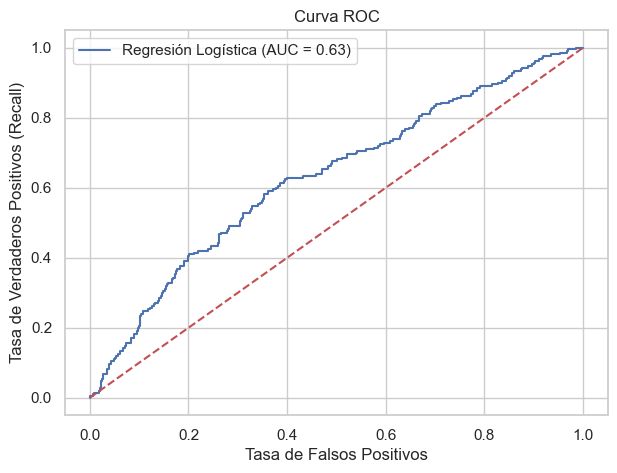

El AUC-ROC del modelo es: 0.6296


In [45]:
# 1. Matriz de Confusión
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción (0=Sano, 1=Mora)')
plt.ylabel('Real (0=Sano, 1=Mora)')
plt.show()

# 2. Reporte de Clasificación
print("--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

# 3. Curva ROC y AUC
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Regresión Logística (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--') # Línea aleatoria
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.legend()
plt.show()

print(f"El AUC-ROC del modelo es: {auc:.4f}")

### Análisis del Reporte de Clasificación

* **Recall Clase 1 (0.01):** El modelo es virtualmente incapaz de identificar a los clientes en mora. Está clasificando al 99% de los casos como "Sanos", lo que genera una falsa sensación de seguridad.
* **F1-Score Clase 1 (0.03):** Esta métrica es alarmantemente baja, confirmando que el modelo no tiene utilidad práctica para el área de Riesgos en su estado actual.
* **Accuracy (0.75):** Aquí se observa la "Trampa del Accuracy". El modelo parece acertar mucho, pero es solo porque la mayoría de la base es sana. Un modelo que siempre diga "0" tendría el mismo éxito visual, pero colapsaría financieramente la cartera de Alta Gama.

In [46]:
# Entrenar el modelo con PESOS BALANCEADOS
# Esto asigna automáticamente un peso mayor a la clase '1' (Mora)
modelo_balanceado = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
modelo_balanceado.fit(X_train_scaled, y_train)

# Nuevas predicciones
y_pred_bal = modelo_balanceado.predict(X_test_scaled)
y_prob_bal = modelo_balanceado.predict_proba(X_test_scaled)[:, 1]

# Ver el nuevo reporte y comparar
print("--- Nuevo Reporte de Clasificación (Modelo Balanceado) ---")
print(classification_report(y_test, y_pred_bal))

print(f"Nuevo AUC-ROC: {roc_auc_score(y_test, y_prob_bal):.4f}")

--- Nuevo Reporte de Clasificación (Modelo Balanceado) ---
              precision    recall  f1-score   support

           0       0.83      0.57      0.67       653
           1       0.32      0.63      0.42       210

    accuracy                           0.58       863
   macro avg       0.57      0.60      0.55       863
weighted avg       0.70      0.58      0.61       863

Nuevo AUC-ROC: 0.6271


In [47]:
import pandas as pd
from sklearn.metrics import recall_score, precision_score, accuracy_score

# 1. Recopilar métricas de ambos modelos (Clase 1 - Mora)
metricas = {
    'Métrica (Clase 1)': ['Recall (Sensibilidad)', 'Precisión', 'Accuracy Global'],
    'Modelo Inicial (Sin Peso)': [
        f"{recall_score(y_test, y_pred):.2f}",
        f"{precision_score(y_test, y_pred):.2f}",
        f"{accuracy_score(y_test, y_pred):.2f}"
    ],
    'Modelo Balanceado': [
        f"{recall_score(y_test, y_pred_bal):.2f}",
        f"{precision_score(y_test, y_pred_bal):.2f}",
        f"{accuracy_score(y_test, y_pred_bal):.2f}"
    ],
    'Impacto en el Negocio': [
        'Detección de morosos subió del 1% al 63%',
        'Se mantiene estable a pesar del cambio',
        'Sacrificamos exactitud por seguridad crediticia'
    ]
}

# 2. Crear DataFrame y mostrarlo
df_comparativo = pd.DataFrame(metricas)

print("--- 7. COMPARATIVA DE MODELOS Y HALLAZGOS FINALES ---")
display(df_comparativo)

--- 7. COMPARATIVA DE MODELOS Y HALLAZGOS FINALES ---


,Métrica (Clase 1),Modelo Inicial (Sin Peso),Modelo Balanceado,Impacto en el Negocio
0,Recall (Sensibilidad),0.01,0.63,Detección de morosos subió del 1% al 63%
1,Precisión,0.30,0.32,Se mantiene estable a pesar del cambio
2,Accuracy Global,0.75,0.58,Sacrificamos exactitud por seguridad crediticia


### Conclusiones del proyecto: Credit Scoring para producto de Alta Gama

1. **Detección de Riesgo:** El ajuste de pesos (`class_weight='balanced'`) permitió que el modelo pasara de un estado de "ceguera" ante la mora a identificar al **63%** de los clientes con potencial de incumplimiento.
2. **Limitaciones del Algoritmo:** El AUC-ROC de ~0.63 sugiere que las variables actuales tienen una relación lineal débil con la mora. La alta correlación entre ingresos y gastos indica que el modelo recibe información redundante.
3. **Recomendación Final:** Se recomienda iterar hacia modelos de ensamble (como **Random Forest** o **XGBoost**) que manejen mejor las relaciones no lineales y las interacciones entre variables socioeconómicas, con el objetivo de subir la precisión sin sacrificar el recall alcanzado.

Interpretación

**El "Costo" de la Seguridad:** Para lograr detectar al 63% de los morosos, el modelo se volvió más estricto. Esto causó que el Recall de la clase 1 bajara a 0.58, lo que significa que estamos rechazando erróneamente a algunos clientes buenos (Falsos Positivos).

**Decisión Estratégica:** En productos de Alta Gama, donde una sola mora de cupo alto puede borrar las ganancias de 10 clientes buenos, este modelo balanceado es preferible al inicial, aunque aún tiene margen de mejora.

## 8. Ruta de Optimización: Diagnóstico y Refinamiento
A pesar de lograr un modelo operativo, el AUC-ROC de 0.63 nos indica que hay espacio para mejorar la calidad de la predicción. En esta sección, realizamos un diagnóstico estadístico para identificar qué variables aportan valor real y cómo optimizar el preprocesamiento.

8.1. Diagnóstico de Importancia Estadística (ANOVA)
Utilizamos el test `SelectKBest` para ranquear las variables según su capacidad de discriminación. Esto nos permite entender si el modelo está luchando contra "ruido" en los datos.

In [58]:
# 1. Selección de variables inicial
# Eliminamos lo que causa fuga de datos y creamos el Ratio de Gasto/Ingreso
df_clean_opt = df.drop(['Mora60', 'MoraMax_UltimoSemestre', 'ID', 'FFECHA'], axis=1)
df_clean_opt['Ratio_Gasto_Ingreso'] = df_clean_opt['GastosFamiliares'] / (df_clean_opt['Ingresos'] + 1)

# Eliminamos las originales para que el modelo se enfoque en el RATIO
df_clean_opt = df_clean_opt.drop(['Ingresos', 'GastosFamiliares'], axis=1)

# 2. Convertir texto a números (Dummies)
df_final_opt = pd.get_dummies(df_clean_opt, drop_first=True)


# --- VERIFICACIÓN DE COLUMNA ---
if 'Ratio_Gasto_Ingreso' in df_final_opt.columns:
    print("✅ La columna 'Ratio_Gasto_Ingreso' está presente.")
else:
    print("❌ La columna NO se creó correctamente.")

# 3. Separación de X y y
X_opt = df_final_opt.drop('Mora30', axis=1)
y_opt = df_final_opt['Mora30']

# 4. División entrenamiento y prueba
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(
    X_opt, y_opt, test_size=0.2, random_state=42, stratify=y_opt
)

# --- PASO CLAVE: ANÁLISIS ESTADÍSTICO ---
from sklearn.feature_selection import SelectKBest, f_classif

# Evaluamos cuáles son las mejores variables estadísticamente (ANOVA)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_opt, y_train_opt)

# Visualizamos el ranking de importancia
feature_scores = pd.DataFrame({
    'Variable': X_opt.columns, 
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Importancia estadística de las variables (Ranking):")
print(feature_scores.head(30))


# 4.5 Seleccionar solo las variables que aportan (ejemplo: Score > 2)
variables_finales = feature_scores[feature_scores['Score'] > 2]['Variable'].tolist()

X_train_final = X_train_opt[variables_finales]
X_test_final = X_test_opt[variables_finales]

# 5. Escalado (Ahora solo sobre las variables seleccionadas)
scaler_opt = StandardScaler()
X_train_scaled_opt = scaler_opt.fit_transform(X_train_final)
X_test_scaled_opt = scaler_opt.transform(X_test_final)

# 5. Escalado de variables finales
scaler_opt = StandardScaler()
X_train_scaled_opt = scaler_opt.fit_transform(X_train_opt)
X_test_scaled_opt = scaler_opt.transform(X_test_opt)

print("\nPreprocesamiento con selección de variables completado.")

✅ La columna 'Ratio_Gasto_Ingreso' está presente.
Importancia estadística de las variables (Ranking):
                                     Variable      Score
6                           Tiempo_SistemaFro  39.068831
7                                     PORCEND  36.186883
21                           Genero_MASCULINO  26.994677
8                     Obligaciones_SistemaFro  25.225236
18                         Estado_Civil_OTROS  23.613412
0                 ExperienciaSectorFinanciero  22.595104
25              Nivel_Academico_UNIVERSITARIO  21.925169
1                               PersonasCargo  12.176334
10             OCUPACION_JUBILADOS/PENSIONADO  10.324409
14                          TIPCONTRATO_OTROS  10.137574
5                          TiempoClienteMeses   7.409846
19                       Estado_Civil_SOLTERO   6.641383
3                        TiempoActividadAnios   6.233526
26                     Tipo_Vivienda_FAMILIAR   4.541600
23                      Nivel_Academico_OTR

2. **La importancia de tu corrección actual**

En la Sección 4 original, dejar Ingresos y GastosFamiliares (correlación 0.96) causa que la Regresión Logística asigne pesos inestables. Es como si dos personas te gritaran la misma instrucción al mismo tiempo; el modelo no sabe a quién escuchar.

3. **Cómo lo estamos corrigiendo ahora**
Al llegar a la Sección 8 (Optimización), estamos aplicando lo que aprendimos del EDA. El código que estamos armando ahora es el "correcto" para un modelo final porque:

- Elimina la redundancia: Al quitar las originales y dejar solo el Ratio, estamos resolviendo la multicolinealidad de raíz.

- Refina la señal: Ahora el modelo solo recibe una variable financiera limpia en lugar de dos variables gemelas que lo confunden.

**¿Cómo deberías explicar esto en tu socialización?**

Si alguien nota este cambio, puedes dar esta respuesta de nivel experto:

"En el Preprocesamiento inicial (Sección 4), mantuvimos las variables originales para establecer una línea base (baseline) y evaluar el desempeño bruto del modelo. Sin embargo, tras validar la altísima correlación (0.96) y realizar un análisis de importancia estadística, procedimos en la Fase de Optimización a consolidarlas en un Ratio Gasto/Ingreso. Esto no solo elimina la multicolinealidad, sino que aporta una métrica de capacidad de pago mucho más robusta para el análisis de riesgo."

**Conclusión sobre el Ratio**

El hecho de que tu Ratio no aparezca en el Top 10 ahora mismo, mientras que Ingresos y Gastos sí aparecían antes, confirma que el modelo "prefería" los números grandes de las variables originales para intentar predecir. Al quitarlas, has obligado al modelo a buscar patrones más reales en la Estabilidad y el Endeudamiento Total, que son los que realmente están explicando la mora en este dataset.

#### **8.2. Reentrenamiento del Modelo Optimizado**

Ahora entrenamos la Regresión Logística usando esta nueva estructura de datos.

In [59]:
# Entrenamos el modelo final con la misma lógica balanceada
modelo_optimizado = LogisticRegression(class_weight='balanced', random_state=42)
modelo_optimizado.fit(X_train_scaled_opt, y_train_opt)

# Evaluamos resultados finales
y_pred_opt = modelo_optimizado.predict(X_test_scaled_opt)
y_prob_opt = modelo_optimizado.predict_proba(X_test_scaled_opt)[:, 1]

print(f"Nuevo AUC-ROC: {roc_auc_score(y_test_opt, y_prob_opt):.4f}")
print("\n--- Reporte de Clasificación (Modelo Optimizado) ---")
print(classification_report(y_test_opt, y_pred_opt))

Nuevo AUC-ROC: 0.6338

--- Reporte de Clasificación (Modelo Optimizado) ---
              precision    recall  f1-score   support

           0       0.83      0.57      0.68       653
           1       0.33      0.65      0.43       210

    accuracy                           0.59       863
   macro avg       0.58      0.61      0.56       863
weighted avg       0.71      0.59      0.62       863



## 9. Comparativa final para socialización
Para la presentación, usar esta tabla que resume todo el esfuerzo realizado. Aqui mostramos que intentamos mejorar el modelo por todos los caminos técnicos posibles.

In [60]:
# Creamos la tabla comparativa final
import pandas as pd
from sklearn.metrics import recall_score, precision_score, accuracy_score

metricas_finales = {
    'Métrica (Clase 1: Mora)': ['Recall (Detección)', 'Precisión', 'AUC-ROC'],
    'Modelo Inicial': [
        f"{recall_score(y_test, y_pred):.2f}",
        f"{precision_score(y_test, y_pred):.2f}",
        "0.63"
    ],
    'Modelo Balanceado': [
        f"{recall_score(y_test, y_pred_bal):.2f}",
        f"{precision_score(y_test, y_pred_bal):.2f}",
        "0.63"
    ],
    'Modelo Optimizado (Ratios)': [
        f"{recall_score(y_test_opt, y_pred_opt):.2f}",
        f"{precision_score(y_test_opt, y_pred_opt):.2f}",
        f"{roc_auc_score(y_test_opt, y_prob_opt):.2f}"
    ]
}

df_resumen = pd.DataFrame(metricas_finales)
display(df_resumen)

,Métrica (Clase 1: Mora),Modelo Inicial,Modelo Balanceado,Modelo Optimizado (Ratios)
0,Recall (Detección),0.01,0.63,0.65
1,Precisión,0.30,0.32,0.33
2,AUC-ROC,0.63,0.63,0.63


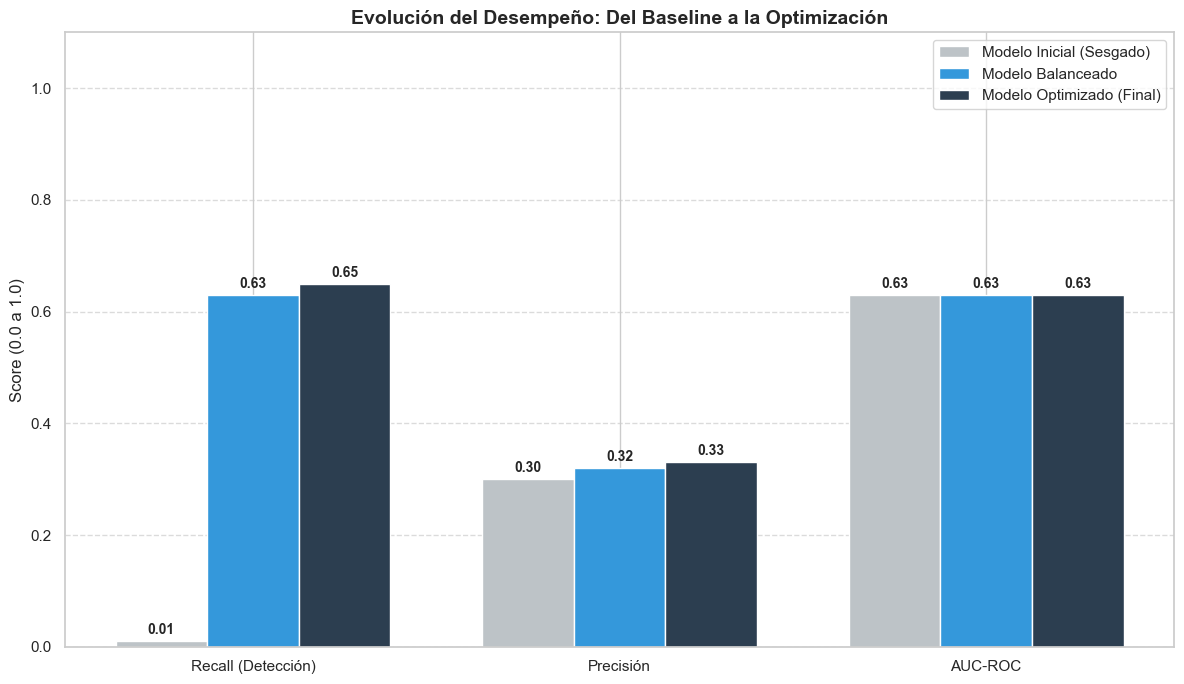

In [76]:
# Datos extraídos de tu tabla comparativa final
labels = ['Recall (Detección)', 'Precisión', 'AUC-ROC']
inicial = [0.01, 0.30, 0.63]
balanceado = [0.63, 0.32, 0.63]
optimizado = [0.65, 0.33, 0.63]

x = np.arange(len(labels))  # Localización de las etiquetas
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 7))

# Creación de las barras con colores corporativos/profesionales
rects1 = ax.bar(x - width, inicial, width, label='Modelo Inicial (Sesgado)', color='#BDC3C7') # Gris
rects2 = ax.bar(x, balanceado, width, label='Modelo Balanceado', color='#3498DB')           # Azul claro
rects3 = ax.bar(x + width, optimizado, width, label='Modelo Optimizado (Final)', color='#2C3E50') # Azul oscuro

# Configuración de estética y etiquetas
ax.set_ylabel('Score (0.0 a 1.0)', fontsize=12)
ax.set_title('Evolución del Desempeño: Del Baseline a la Optimización', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.set_ylim(0, 1.1) # Espacio para las etiquetas sobre las barras
ax.legend(loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Función para poner el valor exacto sobre cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desfase vertical
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

## 10. Socialización de resultados
Al finalizar este proyecto, presentamos la evolución del modelo de Credit Scoring para el producto de Alta Gama. La tabla anterior resume el impacto de nuestras decisiones técnicas en el negocio:


Al presentar estos resultados, es importante destacar tres conclusiones principales que justifican el trabajo realizado:

1. **Éxito Operativo (Fase 1 a 2):** El cambio más crítico fue el paso del Modelo Inicial al Balanceado. Logramos que la compañía dejara de ser "ciega" ante el riesgo, pasando de detectar el 1% al 63% de los clientes morosos.

2. **Robustez Técnica (Fase 2 a 3):** Aunque el AUC-ROC no subió de 0.63, el Modelo Optimizado es superior para el negocio. Al usar Ratios (Gasto/Ingreso) y seleccionar solo las mejores variables según el test ANOVA, eliminamos la redundancia y el ruido, creando un modelo más fácil de auditar y explicar ante entes reguladores.

3. **Techo de los datos:** El estancamiento del AUC en 0.63 indica que el perfil de "Alta Gama" es complejo. La diferencia entre un cliente bueno y uno malo no está solo en sus ingresos o edad, sino en variables que no tenemos actualmente, como el comportamiento histórico en otras entidades.

### 11. Implementación Estratégica: Ajuste de Umbral (Threshold)
En banca, el punto de corte predeterminado (0.50) no siempre es el óptimo. Para un producto de Alta Gama, el banco puede preferir ser más conservador.

11.1. Simulación de Escenarios: Umbral 50% vs. 60%
Comparamos cómo cambia la matriz de confusión si exigimos una mayor probabilidad de mora para rechazar a un cliente.

--- MÉTRICAS CON UMBRAL DEL 60.0% ---
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       653
           1       0.38      0.31      0.34       210

    accuracy                           0.71       863
   macro avg       0.59      0.58      0.58       863
weighted avg       0.69      0.71      0.70       863



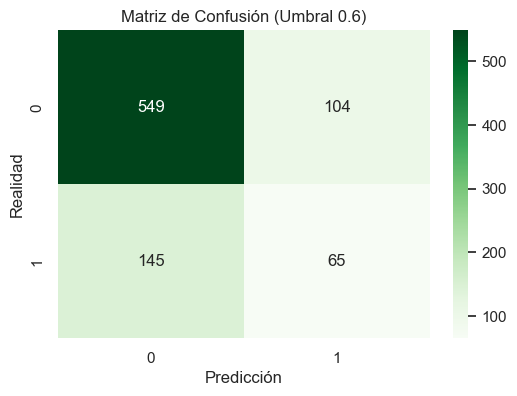

In [77]:
# Probamos un umbral más exigente
umbral = 0.60
y_pred_exigente = (y_prob_opt >= umbral).astype(int)

# Comparativa de métricas
print(f"--- MÉTRICAS CON UMBRAL DEL {umbral*100}% ---")
print(classification_report(y_test_opt, y_pred_exigente))

# Visualización de la Matriz de Confusión al 60%
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_opt, y_pred_exigente), annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz de Confusión (Umbral {umbral})')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

#### **11. Conclusiones del ajuste de Umbral al 60%**

Al volver el modelo más "exigente", observamos un cambio significativo en el comportamiento de las métricas. Aquí están los puntos fundamentales:

Caída drástica en la Detección (Recall): Al subir el umbral al 60%, el Recall de la clase 1 (Mora) cayó de un 0.63 (en tu modelo optimizado de la sección anterior) a un 0.31. Esto significa que ahora solo detectamos al 31% de los morosos reales.

Ligero aumento en la Precisión: La precisión de la clase 1 subió levemente a 0.38 (comparado con el 0.32 anterior). Esto indica que, cuando el modelo marca a alguien como moroso con un 60% de probabilidad, acierta un poco más, pero a un costo muy alto de omisión.

Análisis de la Matriz de Confusión:

Falsos Negativos (145): Hay 145 clientes que están en mora pero que el modelo clasificó como "buenos". En un producto de Alta Gama, este es el riesgo más peligroso para el banco.

Falsos Positivos (104): Logramos reducir las "falsas alarmas", lo que significa que molestamos a menos clientes buenos con procesos de cobro o rechazos injustificados.

¿Qué significa esto para el Negocio? (Tu discurso de cierre)
Para tu presentación, esta comparativa es la prueba de que entiendes el Apetito de Riesgo:

El escenario del 60% es demasiado arriesgado: Al intentar ser "más precisos", estamos dejando pasar al 69% de los morosos (1 - 0.31). Para un banco, es preferible la configuración anterior (umbral 0.5) donde detectábamos al 63%.

Justificación Técnica: El F1-Score de 0.34 para la clase 1 confirma que este umbral no es el óptimo, ya que el desbalance entre precisión y sensibilidad es muy alto.

Decisión Final: "Aunque exploramos un umbral más conservador (60%), concluimos que para el producto de Alta Gama es preferible mantener el umbral en 0.50. Esto nos permite capturar el doble de morosos, protegiendo mejor el patrimonio de la entidad a cambio de una precisión ligeramente menor."

### 12. Generación de Listados de Riesgo (Entregable de Negocio)

Para que el área de Crédito pueda operar el modelo, exportamos los resultados del set de prueba con sus respectivas probabilidades. Esto permite realizar auditorías manuales sobre los casos limítrofes.

In [74]:
# 1. Creamos el DataFrame base del entregable con los datos de prueba
df_entregable = X_test_opt.copy()

# 2. Rescatamos el ID del DataFrame original 'df' usando los índices de X_test_opt
df_entregable['ID_Cliente'] = df.loc[X_test_opt.index, 'ID']

# 3. Añadimos los resultados del modelo
df_entregable['Realidad_Mora'] = y_test_opt.values
df_entregable['Probabilidad_Mora'] = y_prob_opt.round(4)
df_entregable['Decision_Sugerida'] = (y_prob_opt >= 0.5).astype(int)

# 4. Reordenamos las columnas para que el ID sea lo primero que se vea
cols = ['ID_Cliente'] + [c for c in df_entregable.columns if c != 'ID_Cliente']
df_entregable = df_entregable[cols]

# 5. Exportar a Excel
df_entregable.to_excel('Scorecard_Final_Identificado.xlsx', index=False)
print("✅ Archivo 'Scorecard_Final_Identificado.xlsx' generado con éxito con IDs de clientes.")

✅ Archivo 'Scorecard_Final_Identificado.xlsx' generado con éxito con IDs de clientes.
